In [570]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [571]:
df=pd.read_csv(r'..\data\NewsSentiments.csv')

In [572]:
df.describe()

,stock_price,stock_price_after_30_mins,stock_price_after_360_mins,stock_price_after_1440_mins,change_percentage_30,label,change_percentage_360,change_percentage_1440,Positive,Negative,Neutral,Compound
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,171.072185,171.143400,171.735576,171.766589,0.040471,0.105263,0.393036,0.418515,0.100421,0.037211,0.862368,0.612811
std,3.070656,3.216938,3.521269,3.412820,0.256277,0.936586,1.457141,1.861383,0.053644,0.031233,0.055957,0.613391
min,165.554993,165.520004,166.375000,165.670105,-0.456927,-1.000000,-1.381175,-2.263438,0.000000,0.000000,0.770000,-0.930000
25%,169.180000,168.910004,169.042496,169.114998,-0.143906,-1.000000,-0.332286,-0.491490,0.063500,0.013500,0.820500,0.567200
50%,170.010101,170.100006,171.089996,171.410004,0.070603,0.000000,0.002951,0.069531,0.099000,0.033000,0.860000,0.942500
75%,172.980049,173.364998,174.327995,173.244995,0.224130,1.000000,0.525356,0.765315,0.128000,0.063500,0.894000,0.997150
max,177.384995,177.009995,178.360001,177.500000,0.416612,1.000000,3.882579,5.104213,0.214000,0.096000,1.000000,0.999600


In [573]:
df.head(1)

,Date,article_title,article,source_name,source_link,ticker_symbol,stock_price,stock_price_after_30_mins,stock_price_after_360_mins,stock_price_after_1440_mins,change_percentage_30,label,change_percentage_360,change_percentage_1440,Positive,Negative,Neutral,Compound,Sentiment
0,2024-04-29 13:38:00,"Apple upgraded, Tesla downgraded: Wall Street'...",The most talked about and market moving resear...,Yahoo Finance,https://finance.yahoo.com/news/apple-upgraded-...,AAPL,175.306305,175.639999,173.720993,172.785004,0.190349,-1,-0.90431,-1.438226,0.11,0.03,0.86,0.9956,Positive


In [574]:
# Set the style
sns.set_style("whitegrid")
#colors = ["#f1dede", "#d496a7", "#5d576b"] 
#colors = ["#FFB6C1", "#90EE90", "#87CEFA"] 
#colors = ["#003566", "#8d99ae", "#ef233c"] # 2b2d42 for the slope
colors = ["#dabfff", "#907ad6", "#4f518c"] # 2c2a4a for the slope
#colors = ["#002642", "#840032", "#e59500"] # e5dada for the slope



In [575]:
# plt.figure(figsize=(10, 6))
# Create the violin plot
sns.violinplot(x='Sentiment', y='change_percentage', data=df,palette=colors)

# Add labels and title
plt.xlabel('News Sentiments', fontsize=12)
plt.ylabel('Change percentages of the stock price (%)', fontsize=12)
plt.title('Impact of News Sentiments on Stock Price Changes', fontsize=14)

# Show the plot
plt.show()

ValueError: Could not interpret input 'change_percentage'

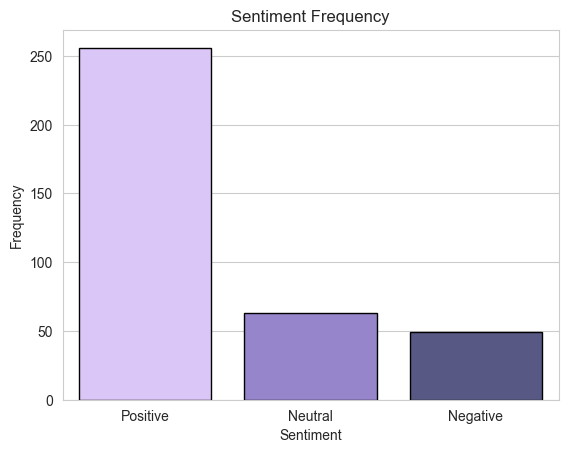

In [ ]:
# plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette=colors,edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Frequency')
plt.show()

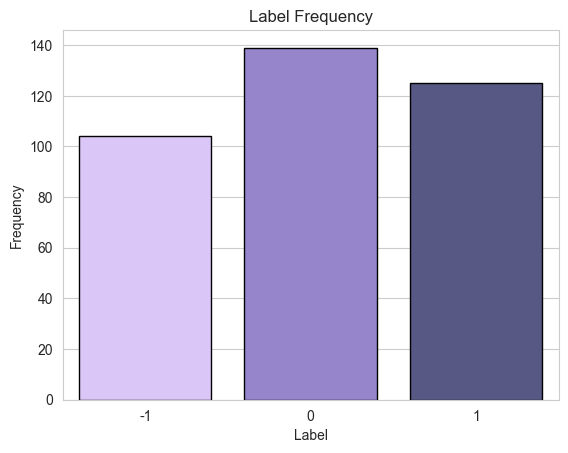

In [ ]:
# plt.figure(figsize=(10, 6))
labels_count= df['label'].value_counts()

sns.barplot(x=labels_count.index, y=labels_count.values,palette=colors,edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency')
plt.show()

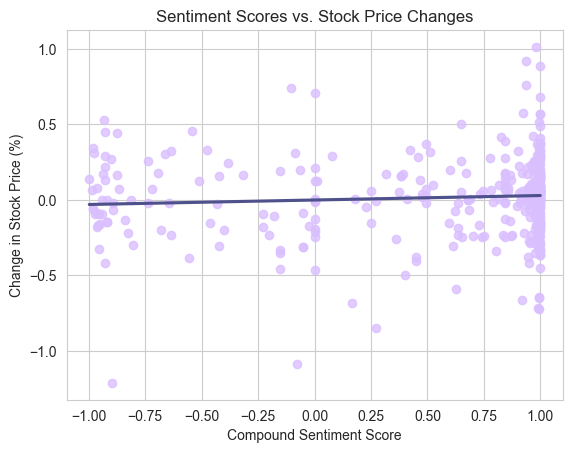

In [ ]:
sns.regplot(x='Compound', y='change_percentage', data=df, scatter=True, color='#dabfff', line_kws={'color':'#4f518c'}, ci=None)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Change in Stock Price (%)')
plt.title('Sentiment Scores vs. Stock Price Changes')
plt.show()

In [ ]:
correlation_coefficient = np.corrcoef(df['Compound'], df['change_percentage'])[0, 1]

print("Correlation coefficient:", round(correlation_coefficient*100,2),'%')

Correlation coefficient: 7.2 %
